# Estimating LAD (Least Absolute Deviations) Regression

In [1]:
@info "Loading package JuMP"
using JuMP
@info "Loading package GLPK"
using GLPK
@info "Loading Plots"
using Plots

┌ Info: Loading package JuMP
└ @ Main In[1]:1
┌ Info: Loading package GLPK
└ @ Main In[1]:3
┌ Info: Loading Plots
└ @ Main In[1]:5


## Phone Data 

In [2]:
year = collect(50:73)
calls=[4.4, 4.7, 4.7, 5.9, 6.6, 7.3, 8.1, 8.8, 10.6, 12.0, 13.5, 14.9, 16.1, 21.2, 119.0, 124.0,
          142.0, 159.0, 182.0, 212.0, 43.0, 24.0, 27.0, 29.0];

## Scatter Plot

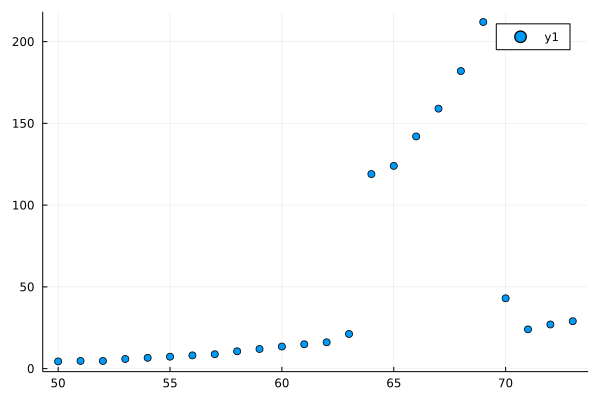

In [3]:
scatter(year, calls)

## Goal Programming Model

$$
\begin{aligned}
\min z & = \sum_{i=1}^{n} d_i^{-} + d_i^{+}\\
\text{subject to:} \\
& y[i] - \beta_0 - \beta_1 x[i] + d_1^{-} - d_1^{+} = 0 \\
& d_i^{-}, d_i^{+} \ge 0 \\
& \beta_0, \beta_1 \in  \mathbb{R} \\
& i = 1, 2, \ldots, n
\end{aligned}
$$

## Creating Model

In [4]:
@info "Creating model"
m = Model(GLPK.Optimizer)

┌ Info: Creating model
└ @ Main In[4]:1


A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: GLPK

## Number of observations

In [5]:
n = length(year)
@info "Length" n

┌ Info: Length
│   n = 24
└ @ Main In[5]:2


## Creating Decision Variables

In [6]:
@info "Creating variables"
@variable(m, d[1:(2n)])
@variable(m, beta0)
@variable(m, beta1);

┌ Info: Creating variables
└ @ Main In[6]:1


## Creating objective function

In [7]:
@info "Creating Goal function"
@objective(m, Min, sum(d[i] for i in 1:(2n)))

┌ Info: Creating Goal function
└ @ Main In[7]:1


d[1] + d[2] + d[3] + d[4] + d[5] + d[6] + d[7] + d[8] + d[9] + d[10] + d[11] + d[12] + d[13] + d[14] + d[15] + d[16] + d[17] + d[18] + d[19] + d[20] + d[21] + d[22] + d[23] + d[24] + d[25] + d[26] + d[27] + d[28] + d[29] + d[30] + d[31] + d[32] + d[33] + d[34] + d[35] + d[36] + d[37] + d[38] + d[39] + d[40] + d[41] + d[42] + d[43] + d[44] + d[45] + d[46] + d[47] + d[48]

## Creating constraints

In [8]:
@info "Creating constraints"
for i in 1:n
    @constraint(m,  calls[i] - beta0 - beta1 * year[i] + d[i] - d[n + i] == 0)
end

┌ Info: Creating constraints
└ @ Main In[8]:1


In [9]:
@info "Adding sign constraints"
for i in 1:(2n)
    @constraint(m, d[i] >= 0)
end

┌ Info: Adding sign constraints
└ @ Main In[9]:1


## Solve!

In [10]:
@info "Solving"
optimize!(m)

┌ Info: Solving
└ @ Main In[10]:1


In [11]:
@info value(beta0)
@info value(beta1)

┌ Info: -75.18999999999991
└ @ Main In[11]:1
┌ Info: 1.529999999999998
└ @ Main In[11]:2


## Estimated Regression Model

$$
\hat{y} = -75.18999 + 1.5299 x 
$$

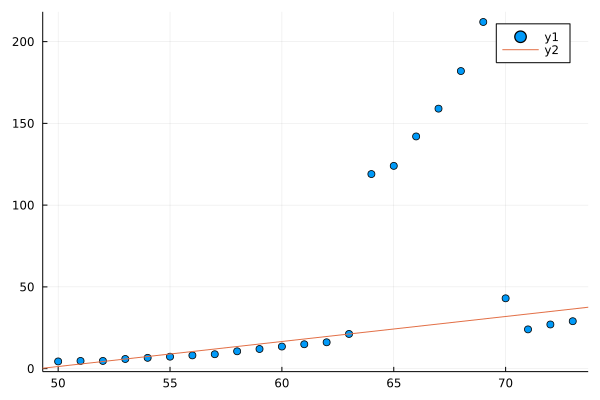

In [16]:
scatter(year,calls)
Plots.abline!(1.5299, -75.18999)